## <center>Performance evaluation of Terapixel rendering in Cloud (Super) computing</center>
<center>Submittive Assignment</center>
<br>
<center><em>Vishal Pawar(220586610)</em></center>

###Installing Packages and Loading Neccessary Libraries

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import pyplot
from pandas import Series
import statistics
from datetime import datetime as dt, date
from dateutil import parser
from pandasql import sqldf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
###Loading and displaying dataset

In [ ]:
application_file = pd.read_csv('/content/gdrive/MyDrive/Cloud Assignment/application-checkpoints.csv')
task_xy = pd.read_csv('/content/gdrive/MyDrive/Cloud Assignment/task-x-y.csv')
gpu_file = pd.read_csv('/content/gdrive/MyDrive/Cloud Assignment/gpu.csv')

In [ ]:
application_file.head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [ ]:
gpu_file.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [ ]:
task_xy.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [ ]:
application_file.shape

(660400, 6)

In [ ]:
gpu_file.shape

(1543681, 8)

In [ ]:
task_xy.shape

(65793, 5)

In [ ]:
application_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660400 entries, 0 to 660399
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  660400 non-null  object
 1   hostname   660400 non-null  object
 2   eventName  660400 non-null  object
 3   eventType  660400 non-null  object
 4   jobId      660400 non-null  object
 5   taskId     660400 non-null  object
dtypes: object(6)
memory usage: 30.2+ MB


In [ ]:
gpu_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543681 entries, 0 to 1543680
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1543681 non-null  object 
 1   hostname        1543681 non-null  object 
 2   gpuSerial       1543681 non-null  int64  
 3   gpuUUID         1543681 non-null  object 
 4   powerDrawWatt   1543681 non-null  float64
 5   gpuTempC        1543681 non-null  int64  
 6   gpuUtilPerc     1543681 non-null  int64  
 7   gpuMemUtilPerc  1543681 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 94.2+ MB


In [ ]:
task_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   taskId  65793 non-null  object
 1   jobId   65793 non-null  object
 2   x       65793 non-null  int64 
 3   y       65793 non-null  int64 
 4   level   65793 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ MB


###Merging all three datasets in a single DataFrame

---


> Applying left join to combine task-x-y & application-checkpoints then combining the newly generated dataframe with gpu with same inner join.






In [ ]:
df_app_task = pd.merge(task_xy, application_file, on = ['jobId','taskId'], how='left')#applying left join
project_data = pd.merge(df_app_task, gpu_file, on = ['timestamp'])#applying inner join

In [ ]:
df_app_task.head()

,taskId,jobId,x,y,level,timestamp,hostname,eventName,eventType
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:06:39.466Z,0745914f4de046078517041d70b22fe7000001,Render,START
1,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:07:09.706Z,0745914f4de046078517041d70b22fe7000001,Uploading,START
2,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:07:09.706Z,0745914f4de046078517041d70b22fe7000001,Render,STOP
3,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:06:39.464Z,0745914f4de046078517041d70b22fe7000001,Saving Config,START
4,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:07:10.688Z,0745914f4de046078517041d70b22fe7000001,Tiling,STOP


In [ ]:
df_app_task.shape

(660400, 9)

In [ ]:
project_data.head()

,taskId,jobId,x,y,level,timestamp,hostname_x,eventName,eventType,hostname_y,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:07:10.688Z,0745914f4de046078517041d70b22fe7000001,Tiling,STOP,265232c5f6814768aeefa66a7bec6ff600000Q,323617020812,GPU-f8ed40fb-e2c2-d6e2-9a66-4b6eaae14912,125.89,39,92,60
1,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:07:10.688Z,0745914f4de046078517041d70b22fe7000001,Tiling,STOP,0d56a730076643d585f77e00d2d8521a00000Q,325117171574,GPU-d84a1024-9381-c725-3b85-dd7143e64c35,25.91,33,0,0
2,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12,2018-11-08T08:14:48.855Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,Uploading,START,d8241877cd994572b46c861e5d144c8500000W,323617021323,GPU-f5716e40-9e60-f0af-7a7a-95d2fc4d2fd9,102.36,41,92,52
3,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12,2018-11-08T08:14:48.855Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,Render,STOP,d8241877cd994572b46c861e5d144c8500000W,323617021323,GPU-f5716e40-9e60-f0af-7a7a-95d2fc4d2fd9,102.36,41,92,52
4,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12,2018-11-08T08:14:49.863Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,TotalRender,STOP,8b6a0eebc87b4cb2b0539e81075191b900000U,323617021463,GPU-f955049b-a429-3eed-f7f1-30a072341123,136.61,49,94,55


In [ ]:
project_data.shape

(337690, 16)

### Extracting time and storing it in new column named "time".

In [ ]:
project_data["time"] = project_data["timestamp"].apply(lambda x: parser.isoparse(x))    

In [ ]:
project_data.head()

,taskId,jobId,x,y,level,timestamp,hostname_x,eventName,eventType,hostname_y,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,time
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:07:10.688Z,0745914f4de046078517041d70b22fe7000001,Tiling,STOP,265232c5f6814768aeefa66a7bec6ff600000Q,323617020812,GPU-f8ed40fb-e2c2-d6e2-9a66-4b6eaae14912,125.89,39,92,60,2018-11-08 08:07:10.688000+00:00
1,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12,2018-11-08T08:07:10.688Z,0745914f4de046078517041d70b22fe7000001,Tiling,STOP,0d56a730076643d585f77e00d2d8521a00000Q,325117171574,GPU-d84a1024-9381-c725-3b85-dd7143e64c35,25.91,33,0,0,2018-11-08 08:07:10.688000+00:00
2,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12,2018-11-08T08:14:48.855Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,Uploading,START,d8241877cd994572b46c861e5d144c8500000W,323617021323,GPU-f5716e40-9e60-f0af-7a7a-95d2fc4d2fd9,102.36,41,92,52,2018-11-08 08:14:48.855000+00:00
3,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12,2018-11-08T08:14:48.855Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,Render,STOP,d8241877cd994572b46c861e5d144c8500000W,323617021323,GPU-f5716e40-9e60-f0af-7a7a-95d2fc4d2fd9,102.36,41,92,52,2018-11-08 08:14:48.855000+00:00
4,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12,2018-11-08T08:14:49.863Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,TotalRender,STOP,8b6a0eebc87b4cb2b0539e81075191b900000U,323617021463,GPU-f955049b-a429-3eed-f7f1-30a072341123,136.61,49,94,55,2018-11-08 08:14:49.863000+00:00


Text(0.5, 1.0, 'Count per EventName')

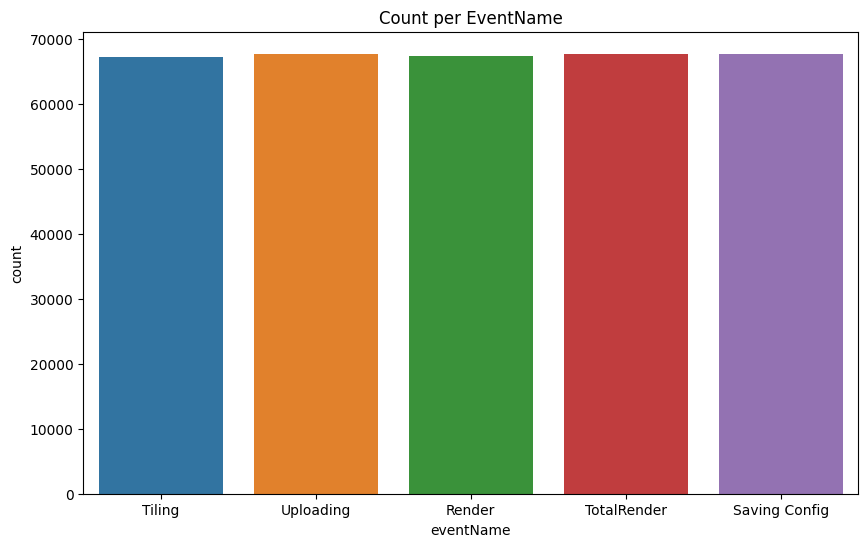

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
count = sns.countplot(x="eventName", data=project_data)
ax.set_title('Count per EventName')

###Calculating the Duration time between START and STOP

---

> To calculate duration time I have created two different dataframes of START and STOP which will make calculating duration time easier.
> Duration Time = stop time - start time

In [ ]:
#Creating two different dataframes to make work easier
df_start = project_data[project_data['eventType'] == 'START']
df_stop = project_data[project_data['eventType'] == 'STOP']

df_start = df_start.rename(columns={"timestamp": "start_time"})
df_stop = df_stop.rename(columns={"timestamp": "stop_time"})

df_start = df_start.drop('eventType', axis = 1)
df_stop = df_stop.drop('eventType', axis = 1)

# convert columns to datetime
df_start["start_time"] = pd.to_datetime(df_start["start_time"])
df_stop["stop_time"] = pd.to_datetime(df_stop["stop_time"])

df = pd.merge(df_start, df_stop, on=['eventName', 'x', 'y', 'level'])

# calculate duration
df['duration'] = (df['stop_time'] - df['start_time']).dt.total_seconds()
df.head()

,taskId_x,jobId_x,x,y,level,start_time,hostname_x_x,eventName,hostname_y_x,gpuSerial_x,...,hostname_x_y,hostname_y_y,gpuSerial_y,gpuUUID_y,powerDrawWatt_y,gpuTempC_y,gpuUtilPerc_y,gpuMemUtilPerc_y,time_y,duration
0,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12,2018-11-08 08:14:48.855000+00:00,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,Uploading,d8241877cd994572b46c861e5d144c8500000W,323617021323,...,83ea61ac1ef54f27a3bf7bd0f41ecaa700001A,8b6a0eebc87b4cb2b0539e81075191b900000U,323617021463,GPU-f955049b-a429-3eed-f7f1-30a072341123,136.61,49,94,55,2018-11-08 08:14:49.863000+00:00,1.008
1,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12,2018-11-08 07:49:17.082000+00:00,83ea61ac1ef54f27a3bf7bd0f41ecaa7000004,Tiling,0745914f4de046078517041d70b22fe7000014,325117064385,...,83ea61ac1ef54f27a3bf7bd0f41ecaa7000004,4ad946d4435c42dabb5073531ea4f31500000Y,320218055700,GPU-a2836c0d-5c10-eff0-4910-9681b4b039a7,128.23,37,93,57,2018-11-08 07:49:18.028000+00:00,0.946
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12,2018-11-08 07:49:17.082000+00:00,83ea61ac1ef54f27a3bf7bd0f41ecaa7000004,Tiling,8b6a0eebc87b4cb2b0539e81075191b900000T,323617021011,...,83ea61ac1ef54f27a3bf7bd0f41ecaa7000004,4ad946d4435c42dabb5073531ea4f31500000Y,320218055700,GPU-a2836c0d-5c10-eff0-4910-9681b4b039a7,128.23,37,93,57,2018-11-08 07:49:18.028000+00:00,0.946
3,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12,2018-11-08 07:49:17.082000+00:00,83ea61ac1ef54f27a3bf7bd0f41ecaa7000004,Tiling,265232c5f6814768aeefa66a7bec6ff600000T,323617020801,...,83ea61ac1ef54f27a3bf7bd0f41ecaa7000004,4ad946d4435c42dabb5073531ea4f31500000Y,320218055700,GPU-a2836c0d-5c10-eff0-4910-9681b4b039a7,128.23,37,93,57,2018-11-08 07:49:18.028000+00:00,0.946
4,000d1def-1478-40d3-a5e3-4f848daee474,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,179,226,12,2018-11-08 08:21:27.481000+00:00,b9a1fa7ae2f74eb68f25f607980f97d700000V,Tiling,b9a1fa7ae2f74eb68f25f607980f97d7000019,324917052134,...,b9a1fa7ae2f74eb68f25f607980f97d700000V,4ad946d4435c42dabb5073531ea4f315000018,325017018095,GPU-6ab2031f-938b-3d9a-fc14-9c9e308d2716,118.93,40,91,46,2018-11-08 08:21:28.583000+00:00,1.102


In [ ]:
df['duration'].head()

0    1.008
1    0.946
2    0.946
3    0.946
4    1.102
Name: duration, dtype: float64

###Correlation heat map for GPU statistics

>The heatmap of the correlation coefficient matrix reveals strong relationships between power drawn, GPU utilization percentage, and GPU memory utilization percentage, indicating that as power consumption increases, both GPU utilization and memory utilization increase.**bold text**

<ipython-input-24-0665f4dc2fa0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = project_data.corr()


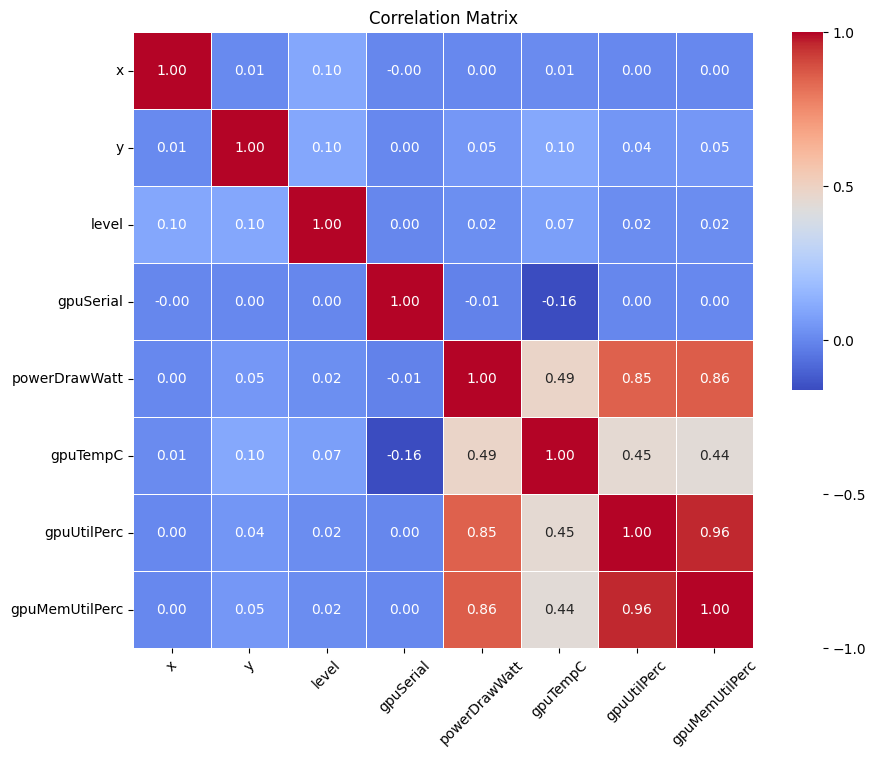

In [ ]:
# Compute the correlation matrix
corr_matrix = project_data.corr()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

# Set the title
ax.set_title('Correlation Matrix')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Adjust the position of the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

# Show the plot
plt.show() 


## Which event types dominate task runtimes?

> 1. Box Plot of Execution Time by Event Name
> 2. Line Graph of Power Draw vs Temperature of the GPU
> 3. Line Graph of Power Draw vs GPU Memory Utility

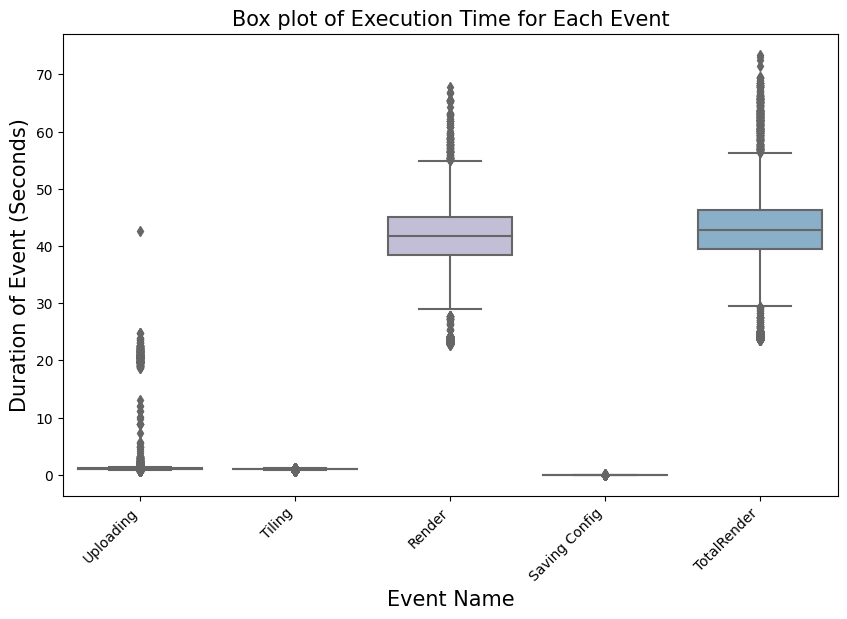

In [ ]:
#Box Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="eventName", y="duration", data=df, ax=ax, palette='Set3')
sns.set(font_scale=1.2)
sns.set_theme(style="darkgrid")
ax.set_xlabel('Event Name', fontsize=15)
ax.set_ylabel('Duration of Event (Seconds)', fontsize=15)
ax.set_title("Box plot of Execution Time for Each Event", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

From figure above we can observe that:

- The majority of the processing time is being consumed by the Event Render function, which is almost equal to the Event TotalRender function. However, there are a significant number of outliers present in both Render and TotalRender. 
- On average, rendering takes 42 seconds.
- Saving Config, Tiling, and Uploading do not require a lot of computational time. 
- There is also a notable amount of outliers present in the Uploading event.

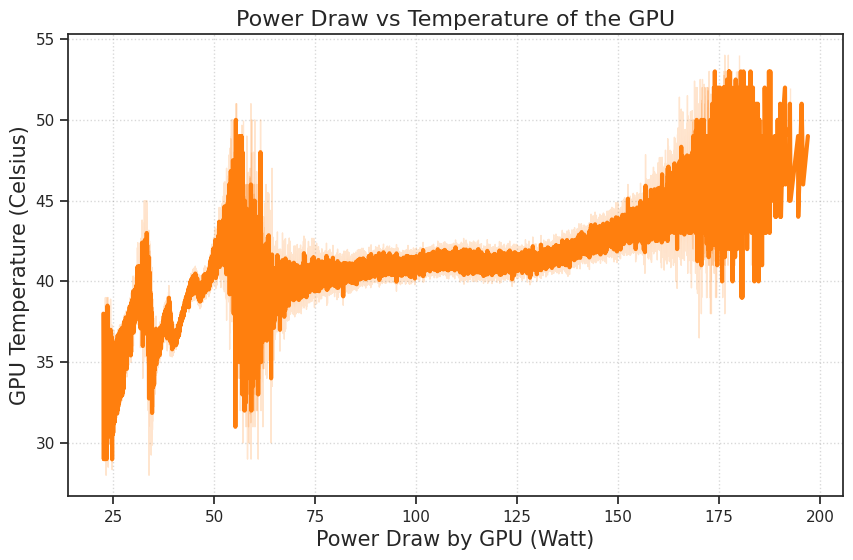

In [ ]:
# Line plot
fig, ax = plt.subplots(figsize=(10, 6)) 
ax = sns.lineplot(data=gpu_file, x="powerDrawWatt", y="gpuTempC", color='#ff7f0e', linewidth=3)
ax.set_xlabel('Power Draw by GPU (Watt)', fontsize=15)
ax.set_ylabel('GPU Temperature (Celsius)', fontsize=15)
ax.set_title("Power Draw vs Temperature of the GPU", fontsize=16)
plt.grid(True, linestyle=':', color='gray', alpha=0.3)
plt.show()


From above generated figure we can observe that:

- As the powerDraw increases the temperature of the gpu also rises.
- We can see that the temperatures fluctuate significantly around 60 watts, indicating that some GPUs with lower performance are reaching higher temperatures at lower power draw.
- We can see that the temperature is increasing with the increase in powerDraw but the increase is not significantly high. This brings us to an conclusion that the cooling infrasture for the GPU is very good.  

As this does not depict the complete picture we will dig more into utilization and memory.


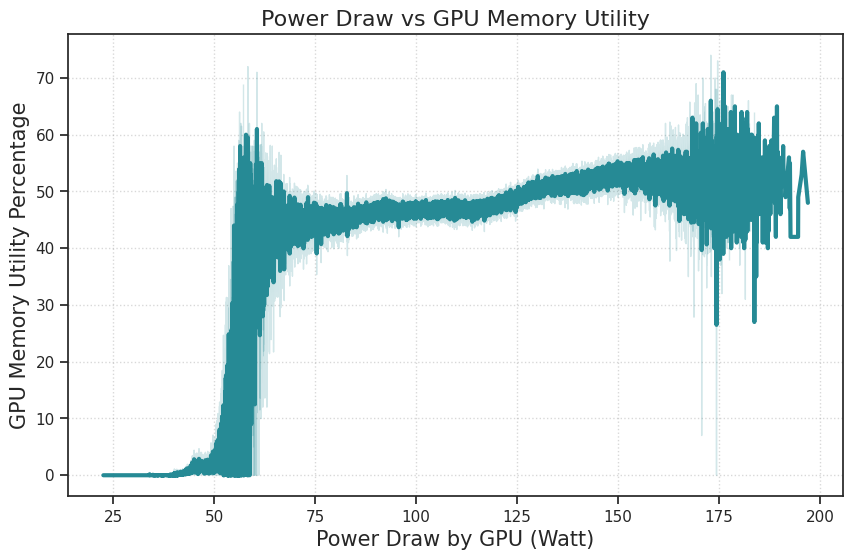

In [ ]:
#line plot
fig, ax = plt.subplots(figsize=(10, 6)) 
ax = sns.lineplot(data=gpu_file, x="powerDrawWatt", y="gpuMemUtilPerc", color='#268a95', linewidth=3)
ax.set_xlabel('Power Draw by GPU (Watt)', fontsize=15)
ax.set_ylabel('GPU Memory Utility Percentage', fontsize=15)
ax.set_title("Power Draw vs GPU Memory Utility", fontsize=16)
plt.grid(True, linestyle=':', color='gray', alpha=0.3)
plt.show()


From the generated figure we can observe that:

- Although this graph also depicts the same story, we can see that with the increase in powerDraw more gpu memory is being utilised.
- Same as the previous graph we can see that at 60W few of the GPU's have reached the peak utilization. So we can infer those are low performing GPU's.
- Also at 160W we can see GPU throttling happen, which can result in performance drop. 

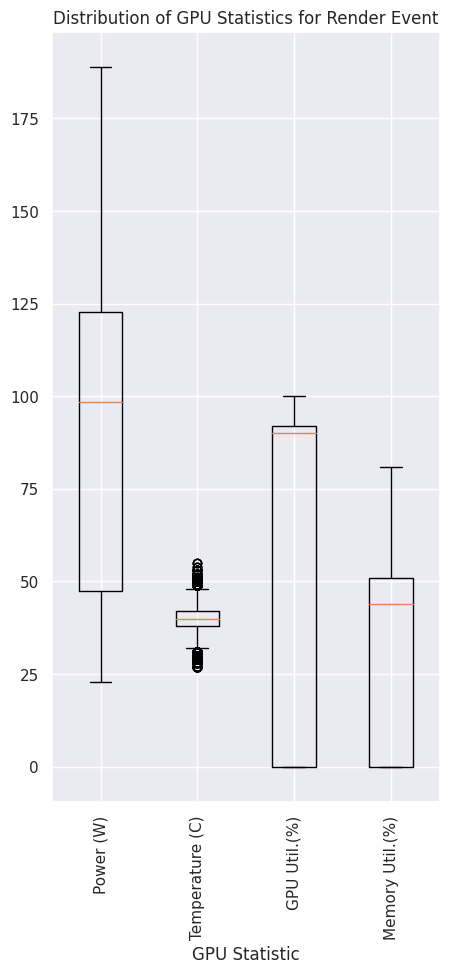

In [ ]:
#GPU Statistics by Event Name
#1. Rendering:-

# group by statistic
plt.boxplot([project_data[project_data['eventName'] == 'Render']['powerDrawWatt'],
             project_data[project_data['eventName'] == 'Render']['gpuTempC'],
             project_data[project_data['eventName'] == 'Render']['gpuUtilPerc'],
             project_data[project_data['eventName'] == 'Render']['gpuMemUtilPerc']])

# setup labels and titles
plt.title('Distribution of GPU Statistics for Render Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
           gpu_stats, rotation='vertical')

# draw plot
plt.rcParams['figure.figsize'] = [5,10]
plt.show()

## What is the interplay between increased power draw and render time?

> 1. Line Graph of Render Time based on Power Draw
> 2. PairPlot of Pairwise Relationships between GPU Variables (Basic)
> 3. PairPlot of Pairwise Relationships between GPU Variables (Advance)

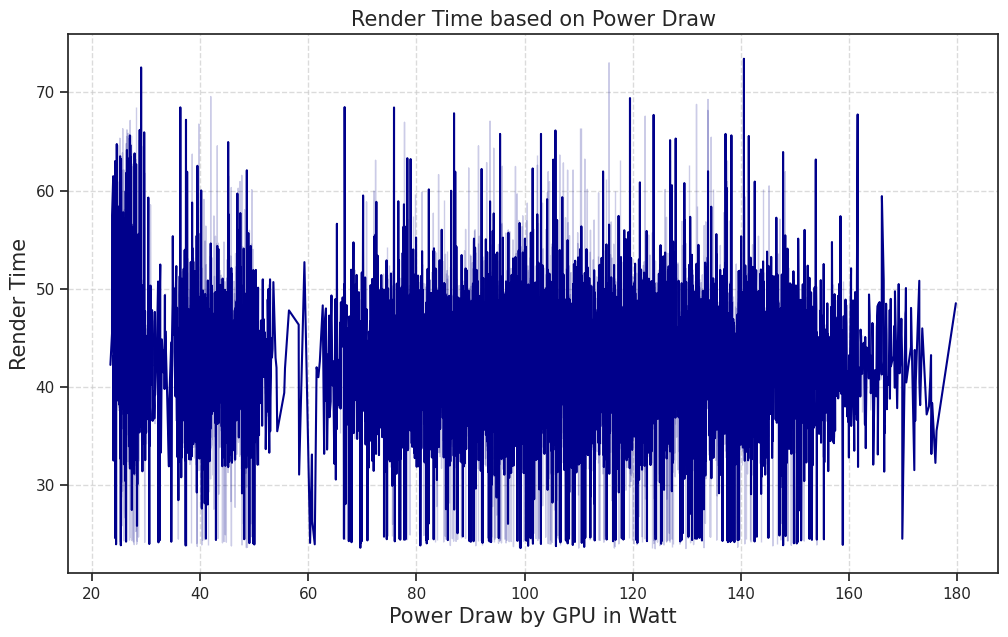

In [ ]:
# line plot 
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.lineplot(data=df.query("eventName == 'TotalRender'"), x="powerDrawWatt_y", y="duration", 
                  markers=True, dashes=False, color='darkblue')
ax.set_xlabel('Power Draw by GPU in Watt', fontsize = 15)
ax.set_ylabel('Render Time', fontsize = 15)
ax.set_title("Render Time based on Power Draw", fontsize = 15)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

From the above figure we can observe that:
- We see no increase in render time despite the increase in power draw from the GPUs.
- Although the power demand has changed significantly overall, the render time hasn't improved much, whereas the render time has improved slightly as the temperature has increased.

ValueError: ignored

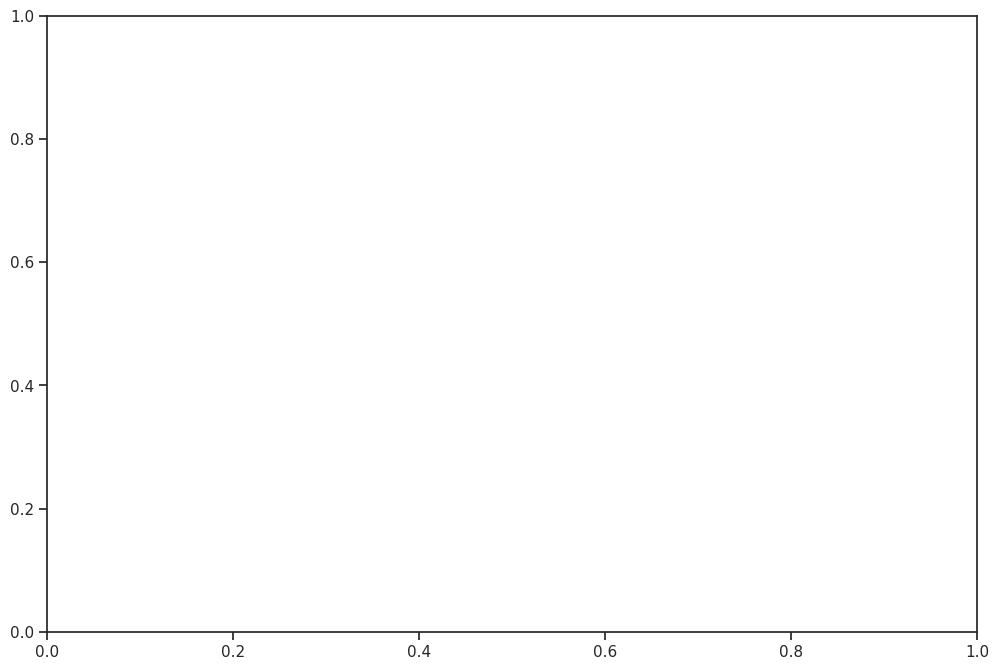

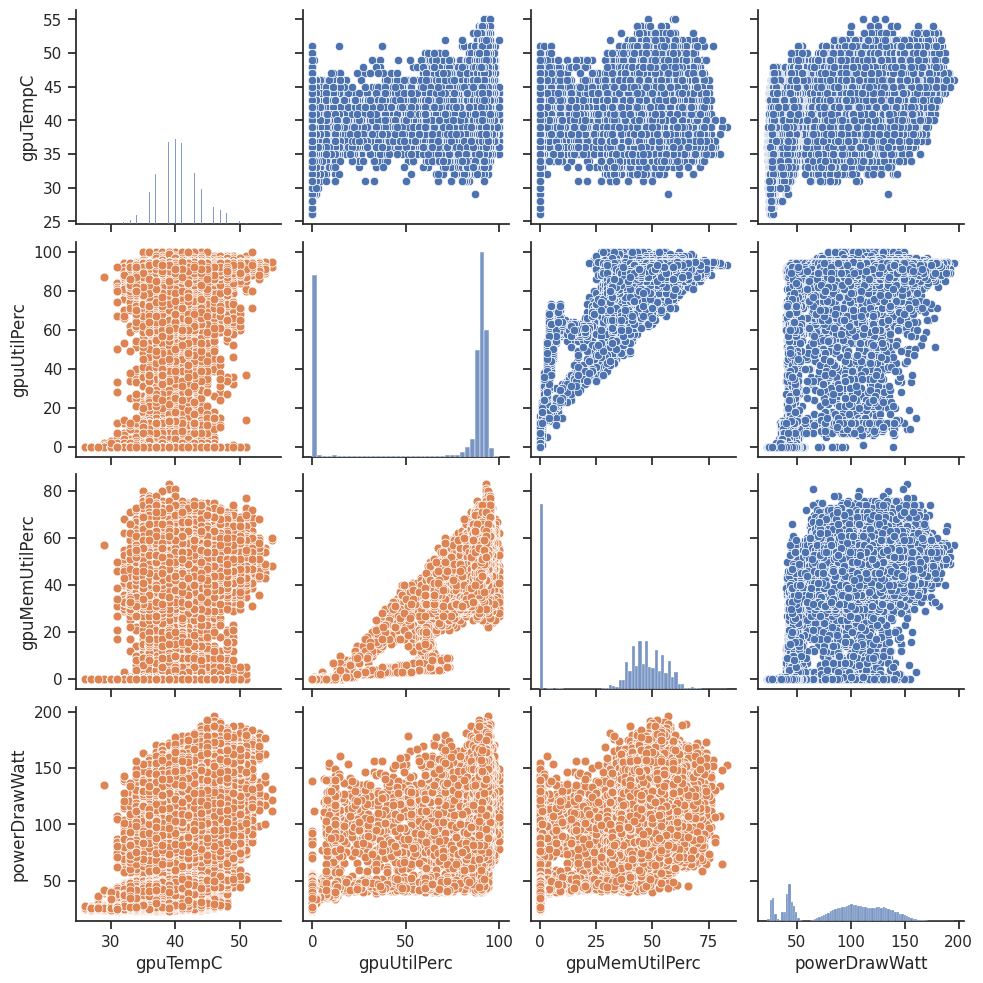

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of your DataFrame containing the GPU variables you want to analyze
gpu_variables = project_data[['gpuTempC', 'gpuUtilPerc', 'gpuMemUtilPerc', 'powerDrawWatt']]

# Set the style and size of the plot
sns.set(style='ticks')
fig, axes = plt.subplots(figsize=(12, 8))

# Use the pairplot function to plot pairwise relationships between the variables
pair_plot = sns.pairplot(gpu_variables)

# Customize the plot
pair_plot.map_lower(sns.scatterplot, s=40, edgecolor='w', linewidth=0.5)
pair_plot.map_upper(sns.kdeplot, cmap='Blues_d', shade=True, shade_lowest=False)
pair_plot.map_diag(sns.histplot, kde=True, color='steelblue', edgecolor='w')

# Set title and axis labels
plt.suptitle('Pairwise Relationships between GPU Variables', fontsize=16)
pair_plot.fig.subplots_adjust(top=0.93)
pair_plot.set(xlabel='X-axis Label', ylabel='Y-axis Label')

# Display the plot
plt.show()


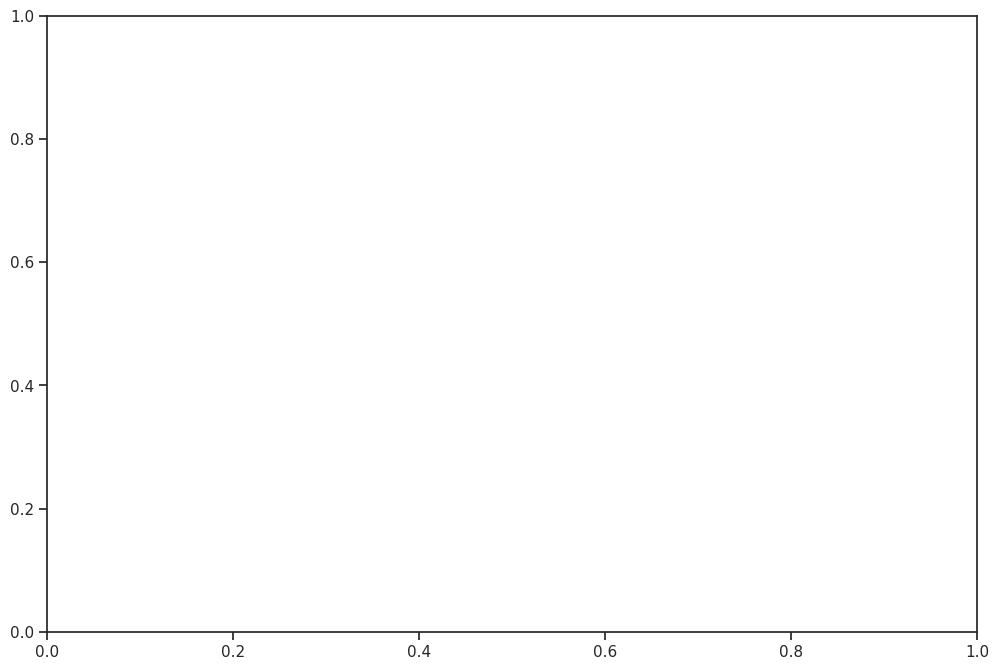

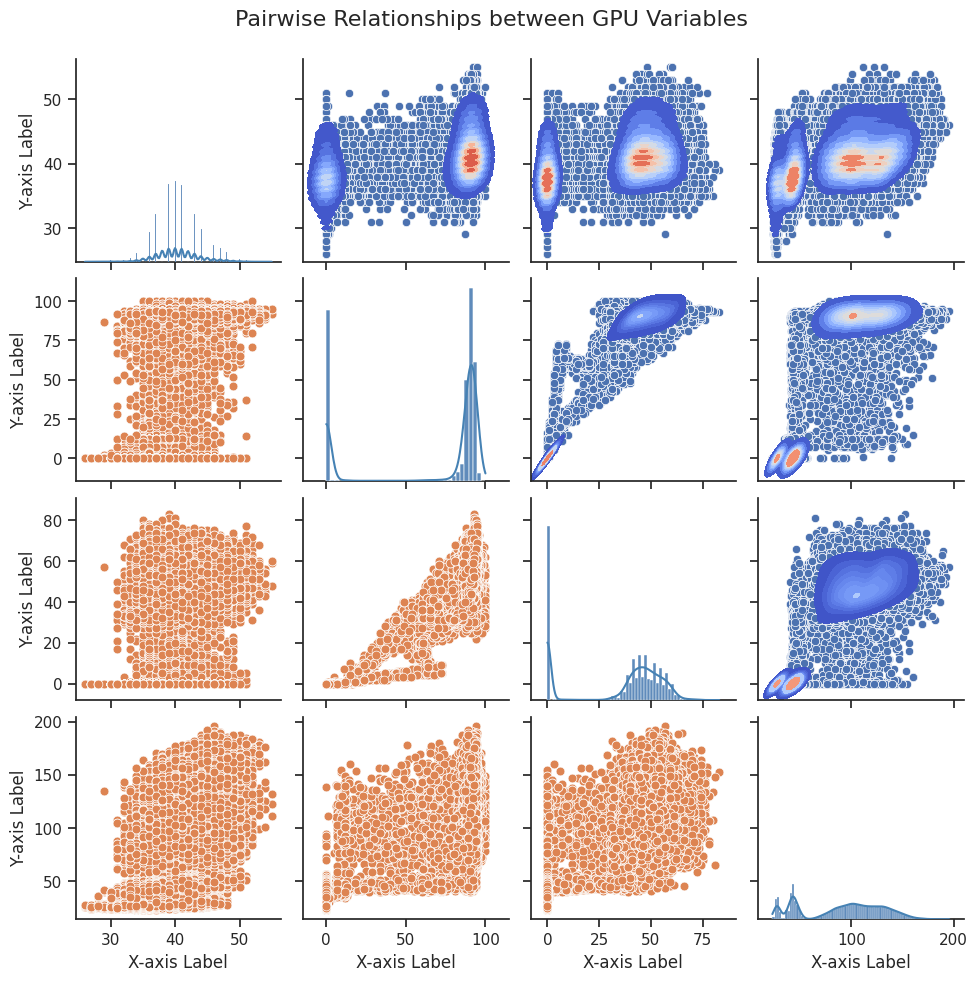

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of your DataFrame containing the GPU variables you want to analyze
gpu_variables = project_data[['gpuTempC', 'gpuUtilPerc', 'gpuMemUtilPerc', 'powerDrawWatt']]

# Set the style and size of the plot
sns.set(style='ticks')
fig, axes = plt.subplots(figsize=(12, 8))

# Use the pairplot function to plot pairwise relationships between the variables
pair_plot = sns.pairplot(gpu_variables)

# Customize the plot
pair_plot.map_lower(sns.scatterplot, s=40, edgecolor='w', linewidth=0.5)
pair_plot.map_upper(sns.kdeplot, cmap='coolwarm', shade=True, shade_lowest=False)
pair_plot.map_diag(sns.histplot, kde=True, color='steelblue', edgecolor='w')

# Set title and axis labels
plt.suptitle('Pairwise Relationships between GPU Variables', fontsize=16)
pair_plot.fig.subplots_adjust(top=0.93)
pair_plot.set(xlabel='X-axis Label', ylabel='Y-axis Label')

# Display the plot
plt.show()


### Can we identify particular GPU cards whose performance differs from other cards?

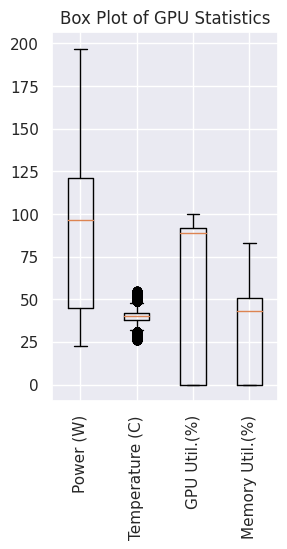

In [ ]:
#Analyzing GPU Hardware performance visually
gpu_stats = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']

plt.subplot(1, 2, 1)
plt.boxplot([gpu_file['powerDrawWatt'], gpu_file['gpuTempC'],
gpu_file['gpuUtilPerc'], gpu_file['gpuMemUtilPerc']])

# Add labels
plt.xticks([i+1 for i, x in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# Plot Title
plt.title('Box Plot of GPU Statistics')
plt.rcParams['figure.figsize'] = [5, 10]

# Saving Image
# plt.savefig('Images/Box-plot.png')
plt.show()

From Fig 5, we can observe that
- The average power consumption is around 95 watts.
- The average temperature is 35 degrees Celsius.
- The average GPU utilization is 80%.
- The average memory utilization is 40%.

This implies that there is a roughly equal number of underperforming and high-performing GPUs, as they all seem to be maintaining an average performance level at high GPU utilization.

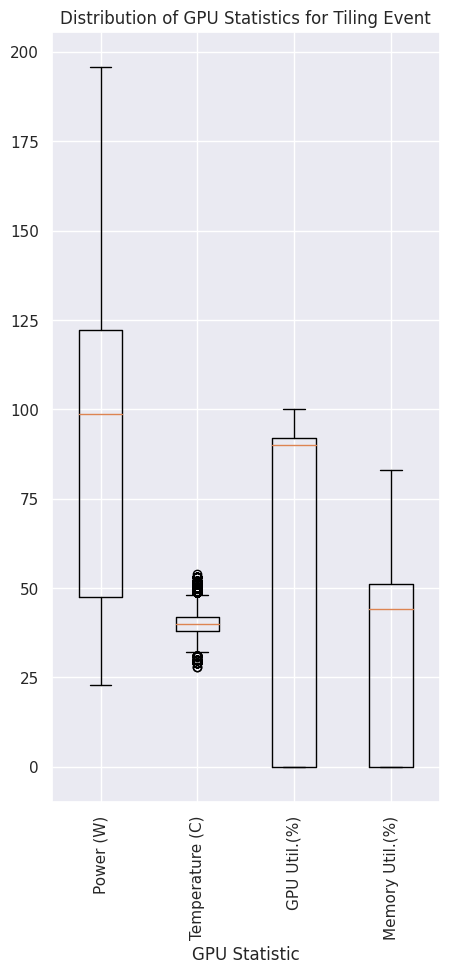

In [ ]:
# group by statistic
plt.boxplot([project_data[project_data['eventName'] == 'Tiling']['powerDrawWatt'], 
             project_data[project_data['eventName'] == 'Tiling']['gpuTempC'],
             project_data[project_data['eventName'] == 'Tiling']['gpuUtilPerc'],
             project_data[project_data['eventName'] == 'Tiling']['gpuMemUtilPerc']])

# setup labels and titles
plt.title('Distribution of GPU Statistics for Tiling Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# draw plot
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()

In [ ]:
gpu_file['gpuSerial'] = gpu_file['gpuSerial'].astype(str)
gpu_powerdraw = gpu_file.groupby('gpuSerial', as_index=False)['powerDrawWatt'].mean()

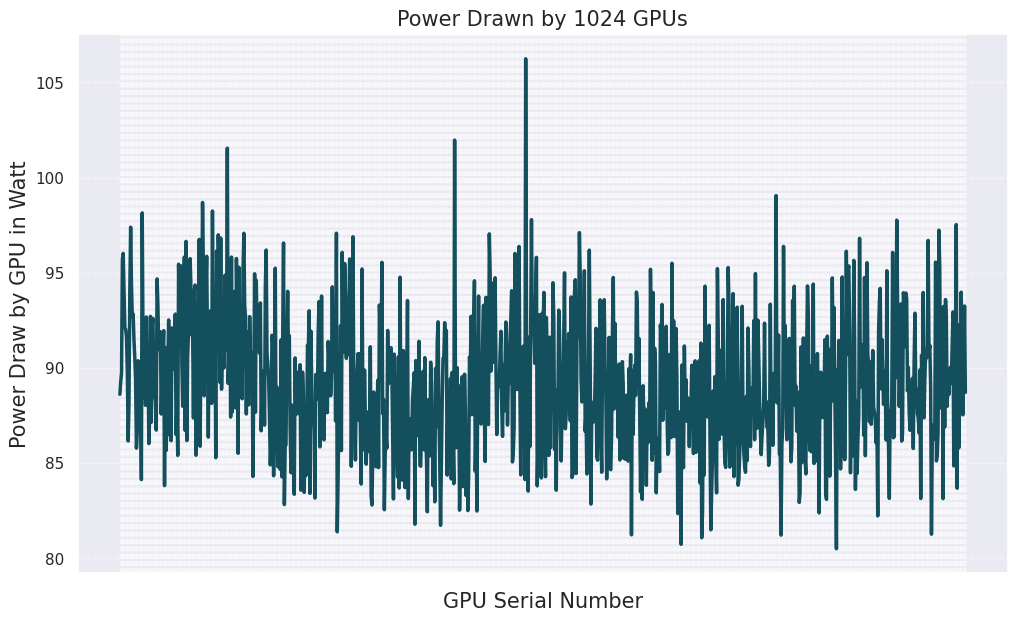

In [ ]:
#Line Plot
fig, ax = plt.subplots(figsize=(12, 7))
sns.set_style("darkgrid")
plot = sns.lineplot(data=gpu_powerdraw, x="gpuSerial", y="powerDrawWatt", ax=ax, color="#134f5c", linewidth=2.5)
plt.xlabel('GPU Serial Number', fontsize=15)
plt.ylabel('Power Draw by GPU in Watt', fontsize=15)
plt.title("Power Drawn by 1024 GPUs", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.5)
plot.set(xticklabels=[])
plt.show()


In [ ]:
#Creating Min and Max GPU's
gpu_powerdraw = gpu_powerdraw.sort_values(by = 'powerDrawWatt') # Sorting by powerDrawWatt...
print("Low Performing GPUs")
df_min = gpu_powerdraw.head(5)
df_min

Low Performing GPUs


,gpuSerial,powerDrawWatt
867,325117171574,80.510313
679,325017017790,80.742673
704,325017018552,81.087075
800,325017049295,81.226755
619,324917052619,81.242179


In [ ]:
print("High Performing GPUs")
df_max = gpu_powerdraw.tail()
df_max

High Performing GPUs


,gpuSerial,powerDrawWatt
100,323217056123,98.698678
794,325017049041,99.057575
130,323217056368,101.549633
405,323617021202,101.974324
491,323617042596,106.247462


In [ ]:
df_gpu_min_max = pd.concat([df_min, df_max])
df_gpu_min_max

,gpuSerial,powerDrawWatt
867,325117171574,80.510313
679,325017017790,80.742673
704,325017018552,81.087075
800,325017049295,81.226755
619,324917052619,81.242179
100,323217056123,98.698678
794,325017049041,99.057575
130,323217056368,101.549633
405,323617021202,101.974324
491,323617042596,106.247462


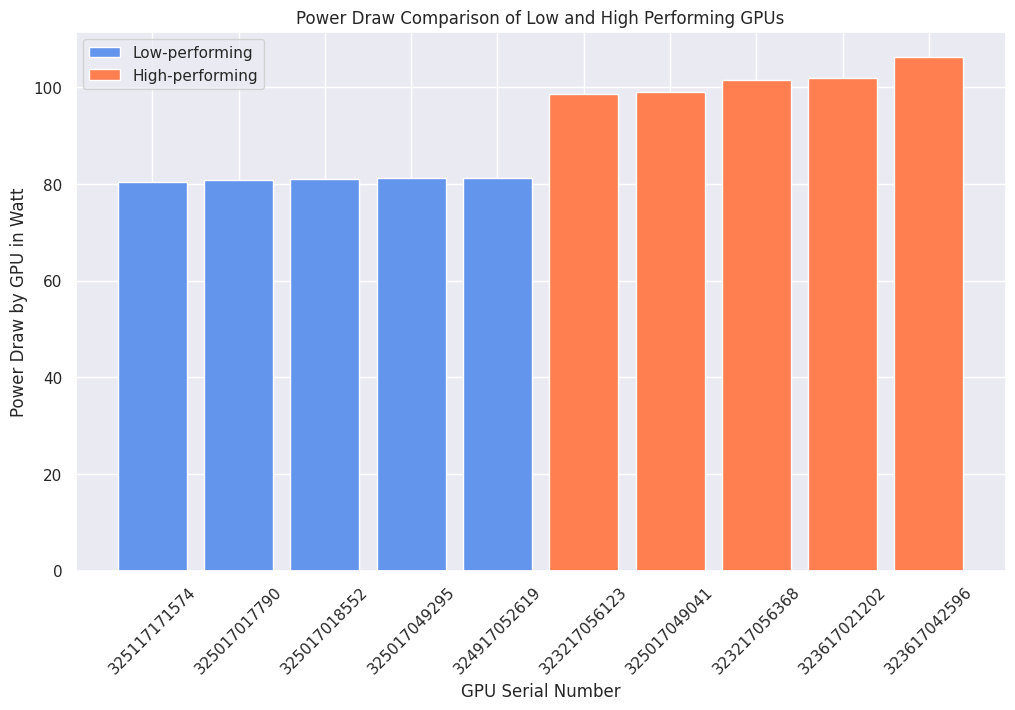

In [ ]:
# Set the x-axis to be the GPU serial number
x = df_gpu_min_max['gpuSerial']

# Set the y-axis to be the power draw in watts
y = df_gpu_min_max['powerDrawWatt']

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x[:5], y[:5], color='#6495ED', label='Low-performing')
ax.bar(x[5:], y[5:], color='#FF7F50', label='High-performing')
ax.set_xlabel('GPU Serial Number')
ax.set_ylabel('Power Draw by GPU in Watt')
ax.set_title('Power Draw Comparison of Low and High Performing GPUs')
plt.xticks(rotation=45)
ax.legend()
plt.show()


In [ ]:
# Pair plot of all the GPU conditions for the Abstract Report.
# 1 picture = 1000 words

render_data = project_data[project_data['eventName'] != 'TotalRender']
avg_data = render_data[['gpuSerial', 'eventName', 'gpuTempC', 'gpuUtilPerc', 'gpuMemUtilPerc', 'powerDrawWatt']].groupby(['gpuSerial','eventName']).mean()
avg_data.reset_index(inplace=True)


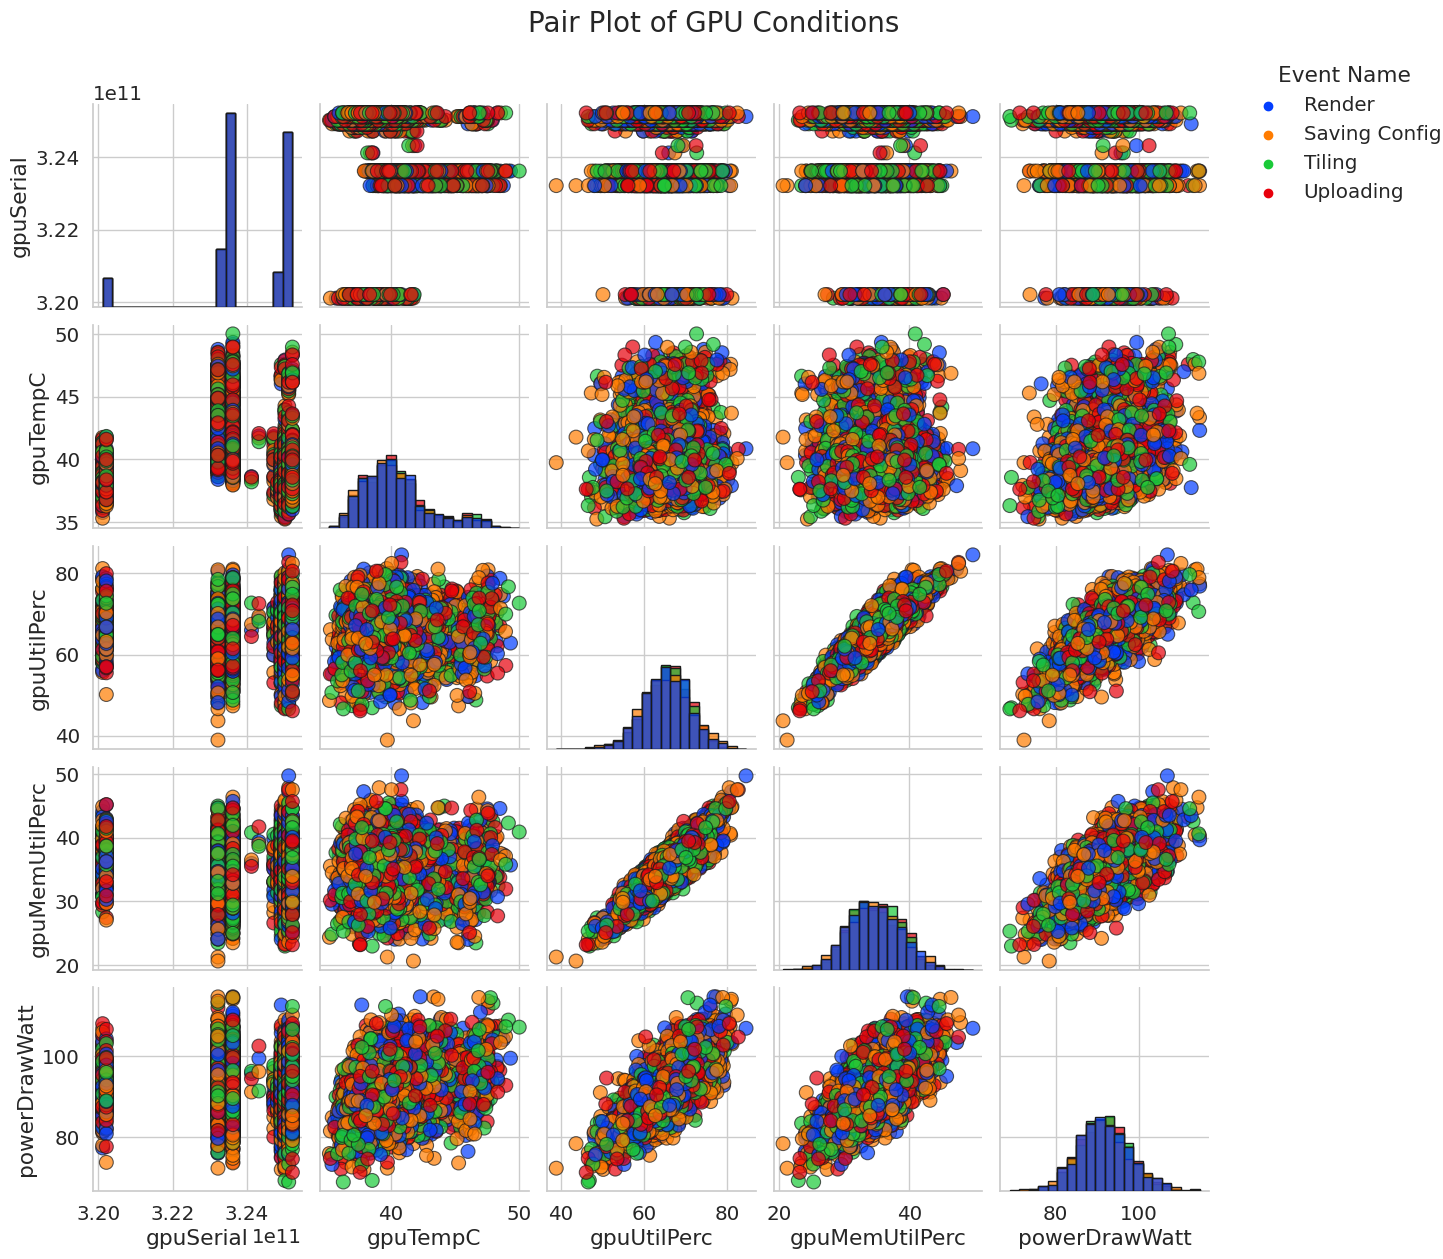

In [ ]:
sns.set(font_scale=1.3, rc={'figure.figsize': (10, 8)})
sns.set_style("whitegrid")
f = sns.pairplot(avg_data, hue="eventName", diag_kind='hist',
                 diag_kws=dict(bins=20, edgecolor="k", linewidth=1, alpha=0.7),
                 plot_kws=dict(s=100, alpha=0.7, edgecolor="k"), palette='bright')

# Set title and adjust spacing
f.fig.suptitle("Pair Plot of GPU Conditions", fontsize=20, y=1.01)
f.tight_layout()

# Customize legend position and title
f._legend.set_title('Event Name')
f._legend.set_bbox_to_anchor((1, 0.9))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Remove unnecessary top and right spines
sns.despine()

# Show the plot
plt.show()


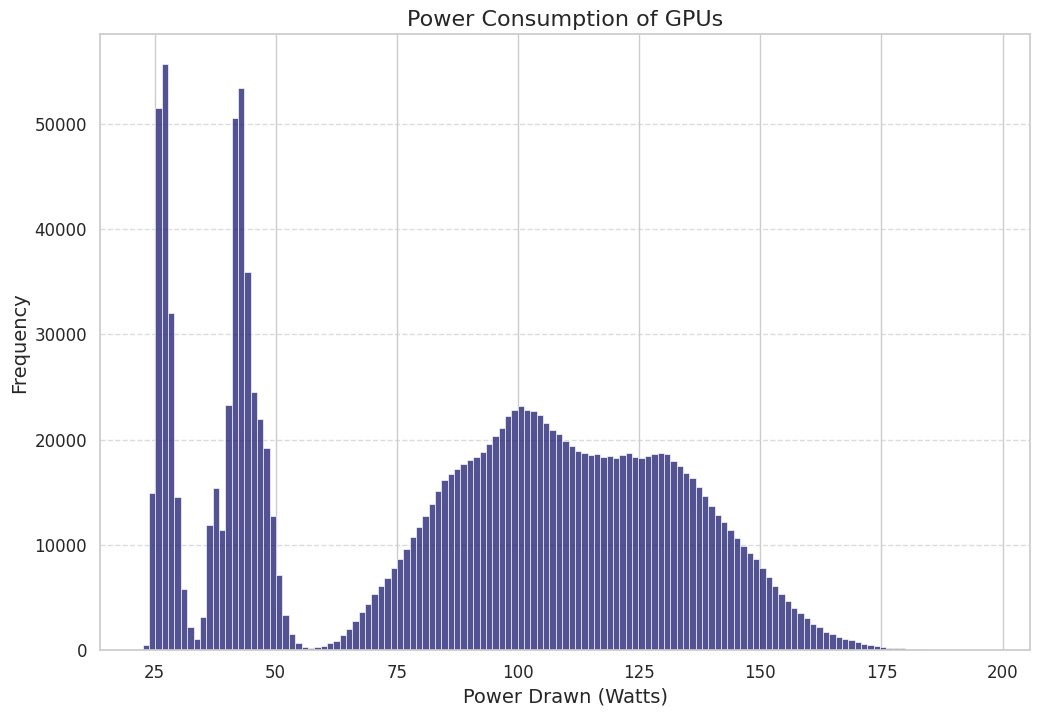

In [ ]:
# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Plot the distribution of power consumption
sns.histplot(data=gpu_file, x='powerDrawWatt', kde=False, color='midnightblue')

# Add labels and title
plt.title('Power Consumption of GPUs', fontsize=16)
plt.xlabel('Power Drawn (Watts)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize tick labels and grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
